In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
poke_df = pd.read_csv('pokemon_data.csv')

In [3]:
poke_df.head(20)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [4]:
filt = (poke_df['Type 1'] == 'Fire')|(poke_df['Type 2'] == 'Fire')
a_fire = poke_df.loc[filt]
filt = (poke_df['Type 1'] == 'Flying')|(poke_df['Type 2'] == 'Flying')
a_flying = poke_df.loc[filt]
filt = (poke_df['Type 1'] == 'Grass')|(poke_df['Type 2'] == 'Grass')
a_grass = poke_df.loc[filt]
filt = (poke_df['Type 1'] == 'Bug')|(poke_df['Type 2'] == 'Bug')
a_bug = poke_df.loc[filt]
filt = (poke_df['Type 1'] == 'Poison')|(poke_df['Type 2'] == 'Poison')
a_poison = poke_df.loc[filt]
filt = (poke_df['Type 1'] == 'Water')|(poke_df['Type 2'] == 'Water')
a_water = poke_df.loc[filt]
py_dict = {'water':a_water, 'poison': a_poison, 'bug':a_bug, 'grass':a_grass, 'flying':a_flying,'fire': a_fire}

In [5]:
print(py_dict['water']['Attack'].mean())
for item in py_dict.keys():
    py_dict[item] = py_dict[item]['Attack'].mean()

73.7063492063492


In [6]:
print(py_dict)

{'water': np.float64(73.7063492063492), 'poison': np.float64(70.79032258064517), 'bug': np.float64(71.76388888888889), 'grass': np.float64(73.46315789473684), 'flying': np.float64(80.22772277227723), 'fire': np.float64(84.109375)}


In [7]:
sp_at = poke_df['Sp. Atk'].to_numpy()
at = poke_df['Attack'].to_numpy()

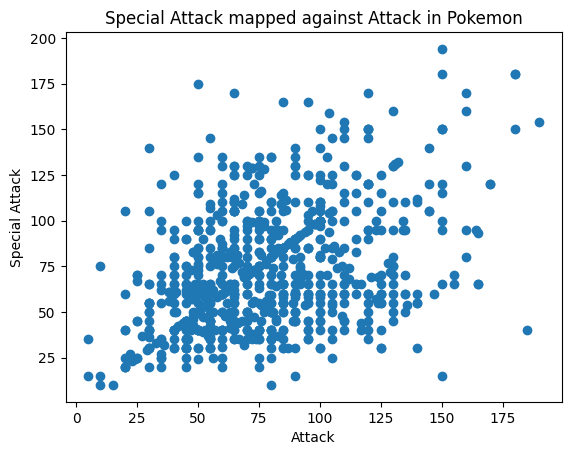

In [8]:
plt.scatter(at, sp_at)
plt.title('Special Attack mapped against Attack in Pokemon')
plt.xlabel('Attack')
plt.ylabel('Special Attack')
plt.show()

Text(0, 0.5, '# of Occurences')

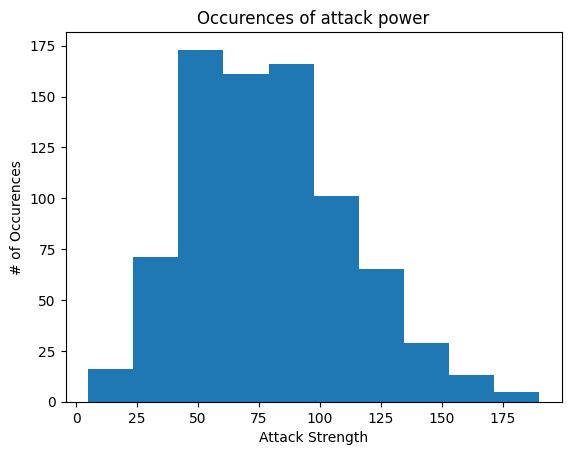

In [9]:
plt.hist(at)
plt.title('Occurences of attack power')
plt.xlabel('Attack Strength')
plt.ylabel('# of Occurences')

In [10]:
high_at_filt = poke_df['Attack']>170
print(poke_df.loc[high_at_filt])

       #                     Name   Type 1    Type 2   HP  Attack  Defense  \
163  150      MewtwoMega Mewtwo X  Psychic  Fighting  106     190      100   
232  214  HeracrossMega Heracross      Bug  Fighting   80     185      115   
424  383    GroudonPrimal Groudon   Ground      Fire  100     180      160   
426  384    RayquazaMega Rayquaza   Dragon    Flying  105     180      100   
429  386       DeoxysAttack Forme  Psychic       NaN   50     180       20   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
163      154      100    130           1       True  
232       40      105     75           2      False  
424      150       90     90           3       True  
426      180      100    115           3       True  
429      180       20    150           3       True  


In [11]:
legendary_filt = poke_df['Legendary'] == True
non_legendary_filt = ~legendary_filt
leg_att = poke_df[legendary_filt]['Attack'].mean()
norm_att = poke_df[non_legendary_filt]['Attack'].mean()
print(leg_att)
print(norm_att)

116.67692307692307
75.66938775510204


In [12]:
poke_df.info()
poke_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [13]:
model = LinearRegression()
d_arr = at.reshape(-1,1)
model.fit(d_arr, sp_at)
coefficients = model.coef_
intercept = model.intercept_
def predict(attack: int)-> int:
    return attack*coefficients + intercept

print(coefficients)
print(intercept)

[0.399597]
41.25133768278019


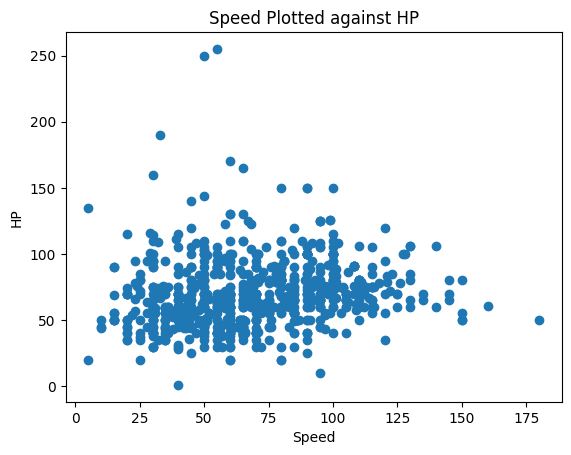

In [14]:
speed_df = poke_df['Speed']
hp_df = poke_df['HP']
plt.scatter(speed_df, hp_df)
plt.xlabel('Speed')
plt.ylabel('HP')
plt.title('Speed Plotted against HP')
plt.show()

In [15]:
model = LinearRegression()
speed_df = speed_df.to_numpy().reshape(-1,1)
hp_df.to_numpy()

array([ 45,  60,  80,  80,  39,  58,  78,  78,  78,  44,  59,  79,  79,
        45,  50,  60,  40,  45,  65,  65,  40,  63,  83,  83,  30,  55,
        40,  65,  35,  60,  35,  60,  50,  75,  55,  70,  90,  46,  61,
        81,  70,  95,  38,  73, 115, 140,  40,  75,  45,  60,  75,  35,
        60,  60,  70,  10,  35,  40,  65,  50,  80,  40,  65,  55,  90,
        40,  65,  90,  25,  40,  55,  55,  70,  80,  90,  50,  65,  80,
        40,  80,  40,  55,  80,  50,  65,  90,  95,  95,  25,  50,  52,
        35,  60,  65,  90,  80, 105,  30,  50,  30,  45,  60,  60,  35,
        60,  85,  30,  55,  40,  60,  60,  95,  50,  60,  50,  50,  90,
        40,  65,  80, 105, 250,  65, 105, 105,  30,  55,  45,  80,  30,
        60,  40,  70,  65,  65,  65,  65,  65,  75,  20,  95,  95, 130,
        48,  55, 130,  65,  65,  65,  35,  70,  30,  60,  80,  80, 160,
        90,  90,  90,  41,  61,  91, 106, 106, 106, 100,  45,  60,  80,
        39,  58,  78,  50,  65,  85,  35,  85,  60, 100,  40,  5

In [17]:
speed_df.shape

model.fit(speed_df, hp_df)

LinearRegression()

In [ ]:
LinearRegression()